# Pytorch Tutorial

## 0. Quickstart

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
  root="data",
  train =True,
  download = True,
  transform=ToTensor(),
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader :
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break


Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


## 1. Tensor

---


In [3]:
import torch
import numpy as np

### 1-1. Initializing a Tensor

* Directly from data

In [4]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

* From a NumPy array

In [5]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

* From another tensor

In [6]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5660, 0.6474],
        [0.5716, 0.4188]]) 



* With random or constant values

In [7]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9239, 0.1170, 0.5714],
        [0.2597, 0.9425, 0.0952]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 1-2. Attributes(속성) of a Tensor

텐서의 속성은  
    
        shape(모양)
        dtype(datatype, 자료형)
        device(저장되는 장치)

  이 존재한다.

In [8]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 1-3. Operations on Tensors

* **텐서의 이동**
  
  텐서는 `to` 메서드를 이용해 CPU에서 GPU로 이동이 가능하다.

In [9]:
# if torch.cuda.is_available():
#   tensor = tensor.to("cuda")

# 맥북이라면

if torch.backends.mps.is_available():
  tensor = tensor.to("mps")

* **NumPy식 표준 인덱싱과 슬라이싱**

In [10]:
tensor = torch.ones(4,4)
print(f"First row: {tensor[0]}")
print(f"First Column: {tensor[:,0]}")
print(f"Last Column: {tensor[...,-1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First Column: tensor([1., 1., 1., 1.])
Last Column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


* **텐서 합치기**

In [11]:
t1 = torch.cat([tensor, tensor, tensor], dim = 0) # dim = 0 means concatenate tensor along column dim
print(t1.shape)

t2 = torch.cat([tensor, tensor, tensor], dim = 1)
print(t2.shape)

t3 = torch.stack([tensor, tensor, tensor], dim = 0) # torch.stack: concatenate with new dim
print(t3.shape)

t4 = torch.stack([tensor, tensor, tensor], dim=1)
print(t4.shape)

torch.Size([12, 4])
torch.Size([4, 12])
torch.Size([3, 4, 4])
torch.Size([4, 3, 4])


* **산술 연산**

In [12]:
# matrix multiplication
# y1, y2, y3 will have the same value
y1 = tensor @ tensor.T 
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

# element-wise product
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

* **단일-요소(single-element) 텐서**  

  텐서의 모든 값을 집계(aggregate)하여 요소가 하나인 텐서는 `item()` 메서드를 사용해 Python 숫자 값으로 변환 가능하다.

In [13]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


### 1-4. Bridge with NumPy

CPU상의 텐서와 NumPy배열은 **메모리 공간을 공유**하기 떄문에, 하나를 변경하면 다른 하나도 변경된다.

* **Tensor to NumPy array**

In [14]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [15]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

np.add(n,1,out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]
t: tensor([3., 3., 3., 3., 3.])
n: [3. 3. 3. 3. 3.]


* **NumPy array to Tensor**

In [16]:
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n,1,out=n)
print(f"n: {n}")
print(f"t: {t}")

n: [2. 2. 2. 2. 2.]
t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## 2. Datasets & DataLoaders

---

더 나은 가독성(Readability)와 모듈성(modularity)을 위해, 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적이다.  
이를 위해 pytorch에서는 2가지 데이터 기본 요소를 제공한다. 


`torch.utils.data.Dataset` : 샘플과 정답(label)을 저장  

`torch.utils.data.DataLoader` : `dataset`을 `iterable`(순회 가능한 객체)로 감싸는 역할  

### 2-1. Loading a Dataset

`Fashion-MNIST` 데이터셋을 불러온다. 각 예제는 28x28 Grayscale Image와 10 Class중 하나인 Label로 구성된다.  

다음 매개변수들을 사용하여 `FashionMNIST` 데이터셋을 불러온다.  

* `root`: 학습/테스트 데이터가 저장되는 경로
* `train`: 학습용/테스트용 데이터셋 여부 지정
* `download=True`: `root`에 데이터가 없는 경우 다운로드
* `transform` `target_transform`: 특징(feature)과 정답(label) 변형(transform)을 지정

In [17]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
  root="data",
  train=True,
  download=True,
  transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

### 2-2. Iterating and Visualizing the Dataset

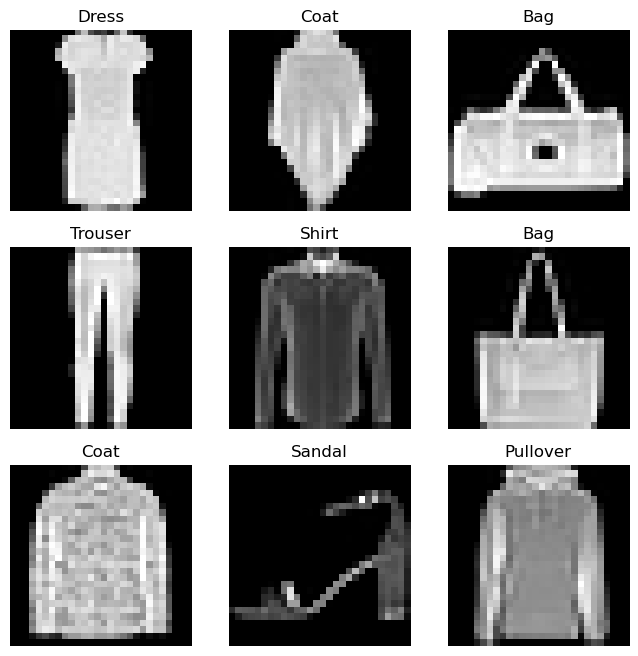

In [18]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 2-3. Creating a Custom Dataset for your files

사용자 정의 Dataset 클래스는 반드시 3개의 함수를 구현해야 한다.  

* `__init__`
* `__len__`
* `__getitem__`

In [19]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)
  
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx,1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

#### **\_\_init\_\_**

**\_\_init\_\_** 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행된다.

#### **\_\_len\_\_**  

`__len__` 함수는 데이터셋의 샘플 개수를 반환한다.

#### **\_\_getitem\_\_**  

`__getitem__` 함수는 주어진 인덱스에 해당하는 샘플을 데이터셋에서 불러오고, 반환한다.  
인덱스를 기반 디스크에서 이미지의 위치를 식별,   
`read_image`를 사용하여 이미지를 텐서로 변환,  
`self.img_labels`의 csv데이터로부터 label을 가져오고,  
(해당하는 경우) transform 함수를 호출한 뒤,  
텐서 이미지와 라벨을 Python Dict형으로 반환한다.

### 2-4. DataLoader

모델을 학습할 때, 샘플들을 minibatch로 전달하고, 매 epoch마다 데이터를 섞어서 overfit을 막고, Python의 Multiprocessing을 사용해 데이터 검색 속도를 높이려 한다.  

`DataLoader`는 간단한 API로 이 과정을 추상화한 순회 가능한 객체(iterable)이다.

In [20]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

`DataLoader`에 데이터셋을 불러온 뒤, 필요에 따라 데이터셋을 순회(iterate)할 수 있다.  

아래의 각 순회(iteration)은 `train_features`(각각 `batch_size=64`의 feature과 label을 포함)와 `train_labels`의 batch를 반환한다.  

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


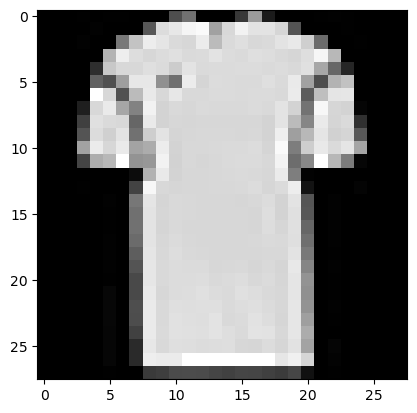

Label: 0


In [21]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## 3. Transform  

Raw Data가 항상 ML Algorithm 학습에 필요한 최종 처리가 된 형태로 제공되지는 않는다. 이에 **Transform**을 해서 데이터를 조작, 학습에 적합하게 만든다.  

모든 TorchVision 데이터셋은 Transformation Logic을 갖는 callable(호출 가능한 객체)를 받는 매개변수 2개를 갖는다.
* `transform`: feature를 변형
* `target_transform`: label을 변형

FashionMNIST의 feature은 PIL Image 형식이고, label은 integer이다. 학습을 위해서는 normalized tensor 형태의 feature와 one-hot encoded tensor 형태의 label이 필요하다. 이를 위해 `ToTensor`와 `Lambda`를 사용한다.

In [22]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
  root = "data",
  train=True,
  download=True,
  transform=ToTensor(),
  target_transform = Lambda(lambda y : torch.zeros(10, dtype=torch.float).scatter_(0,torch.tensor(y), value=1))
)

#### **ToTensor()**

`ToTensor()`은 PIL Image나 NumPy `ndarray`를 `FloatTensor`로 변환하고, 이미지 픽셀의 크기(intensity) 값을 [0.,1.] 범위로 비례하여 조정한다.  

#### Lambda Transform

사용자 정의 lambda함수를 적용한다.  

먼저 크기 10짜리 zero tensor를 만들고, `scatter_`를 호출하여 주어진 정답 y에 해당하는 인덱스에 `value=1`을 할당

## 4. Build the Neural Network

신경망은 layer(계층), module(모듈)로 구성되어 있다. PyTorch의 모든 모듈은 `nn.Module`의 하위 클래스이다. 신경망은 다른 모듈(layers)들을 포함하고 있는 모듈 그 자체이다.

In [23]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 4-1. Get Device for Training

In [28]:
device = (
  "cuda" 
  if torch.cuda.is_available()
  else "mps"
  if torch.backends.mps.is_available()
  else "cpu"
)
print(f"Using \"{device}\" device")

Using "mps" device


### 4-2. Define the Class

신경망 모델을 `nn.Module`의 하위 클래스로 정의하고, `__init__`에서 신경망 계층을 초기화한다.  
`nn.Module`을 상속받은 모든 클래스는 `forward`메서드에 입력 데이터에 대한 연산을 구현한다.

In [29]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 512),
      nn.ReLU(),
      nn.Linear(512, 512),
      nn.ReLU(),
      nn.Linear(512,10),
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [30]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


모델을 사용하기 위해 입력 데이터를 전달한다. (`model.forward()`를 직접 호출 금지!)  

2차원 텐서를 반환한다. dim=0은 각 class에 대한 raw 예측값 10개가, dim=1에는 각 출력의 개별 값이 해당한다.  
원시 예측값을 `nn.Softmax`모듈의 인스턴스에 통과시켜 예측 확률을 얻는다.

In [31]:
X = torch.rand(1, 28, 28, device = device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([4], device='mps:0')


### 4-3. Model Layers

In [32]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


#### **nn.Flatten**

각 28x28의 2d image를 784 픽셀 값을 갖는 연속된 배열로 변환한다.  
(dim=0의 minibatch 차원은 유지)

In [33]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


#### nn.Linear

저장된 weight와 bias를 사용, linear transformation을 적용하는 모듈이다.

In [34]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


#### nn.ReLU()

비선형 활성화(activation)은 모델의 입력과 출력 사이에 복잡한 관계(mapping)을 만든다.

In [35]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.3901, -0.2389,  0.6727, -0.3194, -0.0923,  0.5681, -0.2696,  0.4318,
         -0.5285,  0.2241,  0.0937,  0.1581, -0.1288, -0.6696, -0.1783,  0.3399,
          0.5657, -0.1515,  0.1272,  0.4814],
        [-0.2644, -0.1849,  0.2582, -0.3479,  0.2606,  0.5526, -0.4986,  0.1423,
         -0.5990,  0.2083,  0.1635,  0.2912, -0.2009, -0.4093,  0.0680,  0.2558,
          0.2149, -0.1400, -0.1217,  0.1305],
        [-0.3114, -0.0691,  0.5407, -0.2211, -0.0402,  0.4363, -0.3798,  0.2308,
         -0.5657, -0.0215,  0.4165,  0.1139, -0.1962, -0.4698, -0.1555,  0.2599,
          0.1547, -0.5283,  0.0491,  0.3362]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.6727, 0.0000, 0.0000, 0.5681, 0.0000, 0.4318, 0.0000,
         0.2241, 0.0937, 0.1581, 0.0000, 0.0000, 0.0000, 0.3399, 0.5657, 0.0000,
         0.1272, 0.4814],
        [0.0000, 0.0000, 0.2582, 0.0000, 0.2606, 0.5526, 0.0000, 0.1423, 0.0000,
         0.2083, 0.1635, 0.2912, 0.0000, 0.0000, 0.06

#### nn.Sequential

순서를 갖는 모듈의 컨테이너이다.

In [36]:
seq_modules = nn.Sequential(
  flatten,
  layer1,
  nn.ReLU(),
  nn.Linear(20,10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

#### nn.Softmax

`dim`매개변수는 값의 합이 1이 되는 차원을 나타낸다.

In [37]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### 4-4. Model Parameters

신경망 내부 많은 계층은 매개변수화(parameterize)된다. `nn.Module`을 상속하면 모델 객체 내부의 모든 필드들이 자동으로 추적(track)되며, 모델의 `parameters()` 및 `named_parameters()` 메서드로 모든 매개변수에 접근 가능하게 된다.  

In [38]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
  print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)




/Users/qwerty1029/opt/anaconda3/envs/virtual/lib/python3.10/site-packages/torch/_tensor_str.py:115: UserWarning: MPS: nonzero op is supported natively starting from macOS 13.0. Falling back on CPU. This may have performance implications. (Triggered internally at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_1aidzjezue/croot/pytorch_1687856425340/work/aten/src/ATen/native/mps/operations/Indexing.mm:218.)
  nonzero_finite_vals = torch.masked_select(


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0159,  0.0041, -0.0296,  ..., -0.0077,  0.0121,  0.0101],
        [-0.0357, -0.0169,  0.0094,  ...,  0.0355, -0.0086,  0.0120]],
       device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0227, -0.0348], device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0305, -0.0425, -0.0281,  ..., -0.0383, -0.0439,  0.0430],
        [-0.0122,  0.0280, -0.0046,  ..., -0.0109, -0.0264, -0.0163]],
       device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values : tensor([-0.0260, -0.0441], device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512]) | Values : tensor([[ 0.0123,  0.0416, -0.0155,  ..., -0.0299,  0.0138,  0.0127],
        [-0.0004,  0.0439, -0.0022,  ..

## 5. Autograd

In [40]:
import torch

x = torch.ones(5) # input tensor
y = torch.zeros(3) # expected output
w = torch.randn(5, 3, requires_grad = True)
b = torch.randn(3, requires_grad = True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

### 5-1. Tensors, Functions and Computational graph

`w`와 `b`는 최적화를 해야 하는 매개변수이다. 따라서 이러한 변수에 대해 loss function의 gradient를 계산할 수 있어야 하므로, `requires_grad` 속성을 적용한다.  

연산 그래프를 구성하기 위해 텐서에 적용하는 함수는 `Function` 클래스의 객체이다. 이 객체는 순전파 방향으로 함수를 계산하는 방법과, 역전파 단계에서 도함수(derivative)를 계산하는 방법을 내장한다. 역전파 함수에 대한 참조는 텐서의 `grad_fn`속성에 저장된다.

In [41]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x28fb9c880>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x28fb9ee00>


### 5-2. Computing Gradients

최적화를 위해 매개변수에 대한 손실함수의 도함수를 계산해야 한다.  
즉, ${\partial loss} \over {\partial w}$ 와 ${\partial loss} \over {\partial b}$ 가 필요하다.  
계산을 위해 `loss.backward()`를 호출한 후 `w.grad`와 `b.grad`에서 값을 가져온다.

In [42]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0340, 0.2006, 0.2755],
        [0.0340, 0.2006, 0.2755],
        [0.0340, 0.2006, 0.2755],
        [0.0340, 0.2006, 0.2755],
        [0.0340, 0.2006, 0.2755]])
tensor([0.0340, 0.2006, 0.2755])


### 5-3. Disabling Gradient Tracking

학습한 뒤 입력 데이터를 적용하기만 하는 경우와 같이 순전파 연산만 필요한 경우, 변화도 추적이 필요 없다. 연산 코드를 `torch.no_grad()` 블럭으로 둘러싸 연산 추적을 멈출 수 있다.

In [43]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
  z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


텐서에 `detach()` 메서드를 사용하는 방법도 있다.

In [46]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.reqiures_grad)

AttributeError: 'Tensor' object has no attribute 'reqiures_grad'

## 6. Optimizing Model Parameters

### 6-1. Prerequisite Code

In [47]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


model = NeuralNetwork()

### 6-2. Hyperparameter

* **Number of Epochs** : 데이터셋을 반복하는 횟수
* **Batch Size** : 매개변수 갱신 전 신경망을 통해 전파된 데이터 샘플의 수
* **Learning Rate** : 각 배치/에폭에서 모델의 매개변수를 조절하는 비율.($\alpha$)

In [48]:
learning_rate = 1e-3
batch_size = 64
epoch = 5

### 6-3. Optimization Loop

최적화 단계의 각 반복(iteration)을 **에폭(Epoch)**이라 부른다.  

하나의 에폭은 두 부분으로 구성된다.
* **The Train Loop** : 학습용 데이터셋을 반복하고 최적의 매개변수로 수렴
* **The Validation/Test Loop** : 모델 성능이 개선되는지를 확인하기 위해 테스트 데이터셋을 반복

* **Loss Function**

In [49]:
loss_fn = nn.CrossEntropyLoss()

* **Optimizer**

In [50]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Train Loop에서 최적화는 3단계로 이루어진다.  
* `optimizer.zero_grad()`를 호출하여 gradient를 재설정한다. 기본적으로 gradient는 더해지기(add up) 때문에, 중복을 막기위해 명시적으로 0으로 설정.
* `loss.backwards()`를. 호출하여 prediction loss를 역전파.
* 변화도를 계산한 뒤 `optimizer.step()`을 호출하여 역전파 단계에서 수집된 변화도로 매개변수를 조정.

### 6-4. Full Implementation

In [51]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0,0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [52]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 20
for i in range(epochs):
  print(f"Epoch {i+1}\n-------------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)

print("Done!")

Epoch 1
-------------------------------
loss: 2.306594 [   64/60000]
loss: 2.291153 [ 6464/60000]
loss: 2.272516 [12864/60000]
loss: 2.259020 [19264/60000]
loss: 2.253352 [25664/60000]
loss: 2.223792 [32064/60000]
loss: 2.223578 [38464/60000]
loss: 2.191885 [44864/60000]
loss: 2.183599 [51264/60000]
loss: 2.154202 [57664/60000]
Test Error: 
 Accuracy: 50.0%, Avg loss: 2.146678 

Epoch 2
-------------------------------
loss: 2.154269 [   64/60000]
loss: 2.149766 [ 6464/60000]
loss: 2.083484 [12864/60000]
loss: 2.093733 [19264/60000]
loss: 2.059607 [25664/60000]
loss: 1.991294 [32064/60000]
loss: 2.017833 [38464/60000]
loss: 1.938146 [44864/60000]
loss: 1.938174 [51264/60000]
loss: 1.868316 [57664/60000]
Test Error: 
 Accuracy: 57.5%, Avg loss: 1.865661 

Epoch 3
-------------------------------
loss: 1.895043 [   64/60000]
loss: 1.875481 [ 6464/60000]
loss: 1.741712 [12864/60000]
loss: 1.780182 [19264/60000]
loss: 1.698347 [25664/60000]
loss: 1.635119 [32064/60000]
loss: 1.667984 [38464/

## 7. Save and Load the Model

In [53]:
import torch
import torchvision.models as models

### 7-1. Saving and Loading Model Weights

* 모델 가중치 저장하기

  PyTorch 모델은 학습한 매개변수를 `state_dict`라고 불리는 내부 상태 사전(internal state dictionary)에 저장한다. 이 상태 값들은 `torch.save` 메서드를 사용하여 저장(persist)할 수 있다.

In [54]:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/qwerty1029/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:59<00:00, 9.29MB/s] 


* 모델 가중치 불러오기

  먼저 동일한 모델의 인스턴스를 생성한 후, `load_state_dict()` 메서드를 사용하여 매개변수를 불러온다.

In [55]:
model = models.vgg16()
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

* 주의사항

  추론(interference)을 하기 전, 반드시 `model.eval()`메서드를 호출하여 dropout과 batch normalization을 evaluation mode로 설정해야 한다.

### 7-2. Saving and Loading Models with Shapes

모델의 가중치를 불러올 떄, 신경망의 구조를 정의하기 위해 모델 클래스를 먼저 생성해야 했다.  

이 클래스의 구조를 모델과 함께 저장하고 싶으면, `model.state_dict()`가 아닌 `model`을 저장 함수에 전달한다.

In [56]:
torch.save(model, 'model.pth')

model = torch.load('model.pth')